### How to use search results 

In [1]:
import pandas as pd
import copy
import matplotlib.pyplot as plt 
import seaborn as sns
from seaborn import color_palette, set_style, palplot
#plt.style.use('ggplot')
%matplotlib inline

##### read search results into data frame 

In [2]:
search_result_path ='./data/search_results.csv'
df_search = pd.read_csv(search_result_path)
df_search.drop("Unnamed: 0",axis=1,inplace= True)
df_search.doc_id = df_search.doc_id.astype(str)
df_search.head()

,doc_id,para_id,context,asset quality,bad asset,bad debt,bad loan,bank profitability,bankruptcies,bankruptcy,...,stress test,stress testing,stress-test,stress-testing,sudden reversal,sudden stop,sudden withdrawal,systemic liquidity risk,systemic risk,wholesale funding
0,9781455213887,9781455213887_9,9. Banks’ balance sheets continue to strengthe...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9781455213887,9781455213887_23,"The high degree of dollarization, and the limi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9781455213887,9781455213887_25,21. The 2011 monetary program’s credit and dep...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9781455213887,9781455213887_27,"23. Stability concerns have abated, and the au...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9781455213887,9781455213887_30,A failure of FDI to rebound as projected. The ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Aggregate by doc id 

In [3]:
df_search.fillna(0,inplace=True)   ## replac NaN with 0 
search_keys = copy.deepcopy(df_search.columns.values.tolist())[4:]      ## get all keywords 
# here you can do some filter, for instance get ride of some keys that are revelent 
search_keys.remove('restructuring')  ## delete restructuring, it is everywhere, not very useful
df_search['total_key_frequency'] = df_search[search_keys].sum(axis=1)   ## generage a total keyword sum variable 

In [4]:
df_agg = df_search.groupby(['doc_id'],as_index = False)['total_key_frequency'].sum()
df_agg = df_agg[df_agg.total_key_frequency != 0 ]
df_agg.head()

,doc_id,total_key_frequency
1,9781451800043,8.0
2,9781451800067,10.0
3,9781451800098,3.0
4,9781451800104,8.0
5,9781451800173,3.0


In [5]:
#### Merge metadata filds 
meta_path ='./data/Staff_reports_meta_all.xlsx'
df_meta = pd.read_excel(meta_path,'Sheet1')
df_meta.head()

,doc_id,pdfisbn,title,year_final,imf_country_name,country_code,department,income,document_word_count
0,9781475536485,9.781476e+12,Republic of Azerbaijan : 2016 Article IV Consu...,2016,Azerbaijan,912.0,MCD,EM,9669.0
1,9781475536263,9.781476e+12,Jordan : Request for an Extended Arrangement U...,2016,Jordan,439.0,MCD,EM,8594.0
2,9781475535556,9.781476e+12,Bosnia and Herzegovina : Request for Extended ...,2016,Bosnia and Herzegovina,963.0,EUR,EM,6707.0
3,9781475535860,9.781476e+12,Kiribati : 2016 Article IV Consultation-Press ...,2016,Kiribati,826.0,APD,LIC,9506.0
4,9781475532593,9.781476e+12,Ecuador : Purchase Under the Rapid Financing I...,2016,Ecuador,248.0,WHD,EM,3332.0


In [6]:
df = pd.merge(df_agg,df_meta,on='doc_id')  ## merge, inner join
print("Total Number of Documents: {}".format(len(df)))
df.head()

Total Number of Documents: 2869


,doc_id,total_key_frequency,pdfisbn,title,year_final,imf_country_name,country_code,department,income,document_word_count
0,9781451800043,8.0,9.781453e+12,The Kingdom of the Netherlands-Aruba : 2002 Ar...,2002,Aruba,533.0,NaN,EM,4185.0
1,9781451800067,10.0,9.781453e+12,Kingdom of the Netherlands—Aruba : Staff Repor...,2001,Aruba,533.0,NaN,EM,7485.0
2,9781451800098,3.0,9.781452e+12,Kingdom of the Netherlands—Aruba : Staff Repor...,2005,Aruba,533.0,NaN,EM,5642.0
3,9781451800104,8.0,9.781453e+12,Kingdom of the Netherlands : Aruba: 2007 Arti...,2007,Aruba,533.0,NaN,EM,4854.0
4,9781451800173,3.0,9.781453e+12,Islamic State of Afghanistan : Staff Report fo...,2003,Afghanistan,512.0,MCD,LIC,9165.0


#### Aggregate it again by country and year

In [7]:
df_agg = df.groupby(['year_final','imf_country_name','country_code','income'],as_index = False)['total_key_frequency','document_word_count'].sum()
df_agg['freq_norm'] = df['total_key_frequency']/df['document_word_count']*1000    ## keyword frequencey per 1000 words 
df_agg.index = pd.to_datetime(df_agg['year_final'],format='%Y')
df_agg.head(10)

,year_final,imf_country_name,country_code,income,total_key_frequency,document_word_count,freq_norm
year_final,,,,,,,
1995-01-01,1995,Antigua and Barbuda,311.0,EM,2.0,3950.0,1.911589
1995-01-01,1995,Argentina,213.0,EM,6.0,6317.0,1.336005
1995-01-01,1995,Armenia,911.0,EM,8.0,7963.0,0.531726
1995-01-01,1995,Australia,193.0,AM,2.0,7242.0,1.648125
1995-01-01,1995,Austria,122.0,AM,2.0,5203.0,0.327332
1995-01-01,1995,Azerbaijan,912.0,EM,28.0,15987.0,0.521866
1995-01-01,1995,"Bahamas, The",313.0,EM,1.0,4107.0,0.126135
1995-01-01,1995,Bangladesh,513.0,LIC,14.0,8651.0,1.806452
1995-01-01,1995,Belarus,913.0,EM,19.0,13135.0,1.223491


### Now let's take a look at data for US 

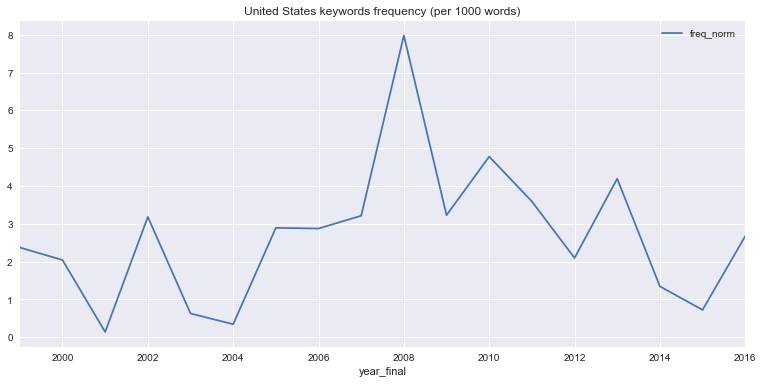

In [8]:
countryname= "United States"
countrycode = 111

df_plot = df_agg[df_agg['country_code']==countrycode].copy()
df_plot.plot(x='year_final',y='freq_norm',figsize=(13,6),title=countryname + " keywords frequency (per 1000 words)")

In [ ]:
df_plot